# Importing necessary libraries library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Steps in this process :

### 1) Data Cleaning
### 2) Data Analysis
### 3) Feature Engineering
### 4) Modelling
### 5) Website
### 6) Deployment

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### Check for duplicates

In [6]:
df.duplicated().sum() # if returns 0, it means that no duplicate row at all !!!!!!

0

### Check for missing values

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [9]:
df['Ram'][0:5]

0     8GB
1     8GB
2     8GB
3    16GB
4     8GB
Name: Ram, dtype: object

In [10]:
df.iloc[0:6]['Ram'].values

array(['8GB', '8GB', '8GB', '16GB', '8GB', '4GB'], dtype=object)

# Preprocessing the data

#### dropping the 'unnamed:0' column,  

In [11]:
df.drop(columns=['Unnamed: 0'],inplace=True)

#### Remove 'GB' from RAM

In [12]:
def remove_GB_keyword(obj):
    s=str(obj)
    return s.replace("GB","")

df['Ram']=df['Ram'].apply(remove_GB_keyword)

In [13]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#### Remove 'kg' from Weight

In [14]:
def remove_weight(obj):
    s=str(obj)
    return s.replace("kg","")

df['Weight']=df['Weight'].apply(remove_weight)

In [15]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


### Converting the datatype of Weight Column to float and Ram column to int

In [16]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float') 

In [17]:
type(df.iloc[0]['Ram'])

numpy.int32

In [18]:
df.info() # Verifying the same using the info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


# Perform EDA

In [19]:
import seaborn as sns

D:\Users\Newtan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

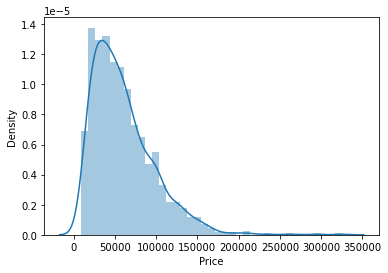

In [20]:
sns.distplot(df['Price']) # distplot depicts the variation in the data distribution. 
#distplot represents the overall distribution of continuous data variables.

<AxesSubplot:>

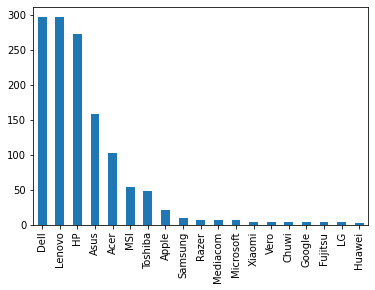

In [21]:
df['Company'].value_counts().plot(kind='bar')

### Barplot to see like which company has the most costliest laptops

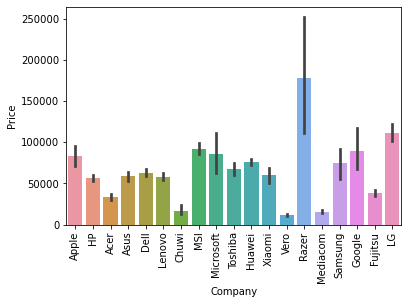

In [22]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Showing the different kinds of laptop

<AxesSubplot:>

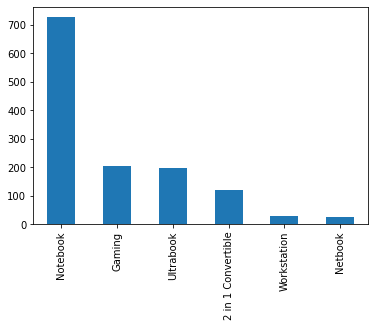

In [23]:
df['TypeName'].value_counts().plot(kind='bar')

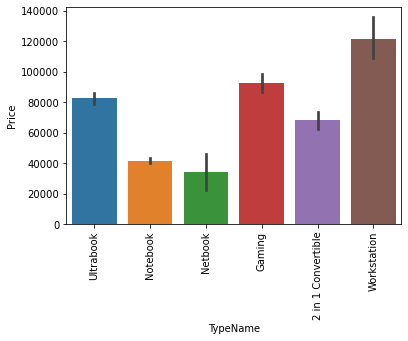

In [24]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

D:\Users\Newtan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

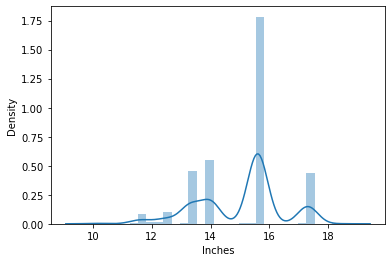

In [25]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

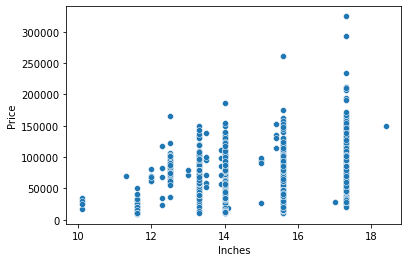

In [26]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

### From the above scatterplot, we can infer that thought the relation between the inches and price is not very strong, but still some of the most expensive ones have bigger screen and the smaller size ones have less prizes.

# Resolving the Screen Resolution Column.

In [27]:
df['ScreenResolution'].value_counts()[0:10]

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
Name: ScreenResolution, dtype: int64

### Making a new column called 'Touchscreen' to determine if the product supports touchscreen ability

In [28]:
def is_touchscreen(obj):
    s=str(obj)
    if 'Touchscreen' in s:
        return 1
    return 0

df['Touchscreen'] = df['ScreenResolution'].apply(is_touchscreen)

In [29]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<AxesSubplot:>

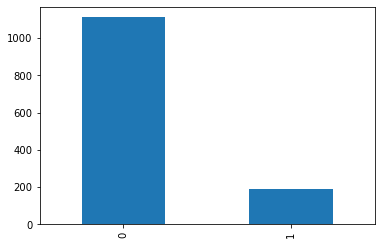

In [31]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

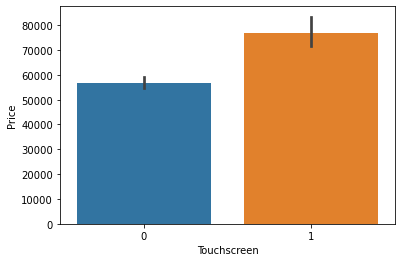

In [33]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
# Hence, the touchscreen laptop generally are having more price

### Making a new column called 'Ips' to determine if IPS is there in the screen or not

In [34]:
def is_tips(obj):
    s=str(obj)
    if 'IPS' in s:
        return 1
    return 0

df['Ips'] = df['ScreenResolution'].apply(is_touchscreen)

In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0


<AxesSubplot:>

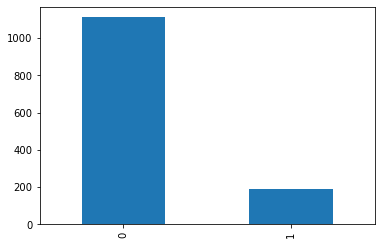

In [38]:
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

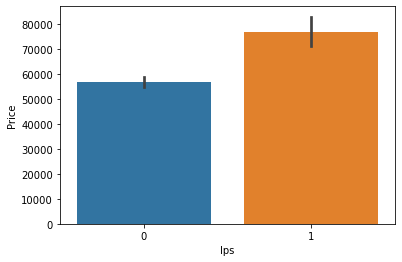

In [39]:
sns.barplot(x=df['Ips'],y=df['Price'])

## Making two new columns to store the x and y coordinates

In [41]:
def coord(obj):
    s=str(obj)
    return s.split('x')

df['coordinates']=df['ScreenResolution'].apply(coord)

In [42]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,coordinates
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,"[IPS Panel Retina Display 2560, 1600]"
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,"[1440, 900]"
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,"[Full HD 1920, 1080]"
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,"[IPS Panel Retina Display 2880, 1800]"
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,"[IPS Panel Retina Display 2560, 1600]"


In [43]:
def get_y(obj):
    lists=obj[0].split(' ')
    return lists[len(lists)-1]

df['x_coordinate']=df['coordinates'][1]
df['y_coordinate']=df['coordinates'].apply(get_y)

ValueError: Length of values (2) does not match length of index (1303)